In [1]:
# https://github.com/thohemp/6drepnet
from loreal_poc.dataloaders.loaders import DataLoaderFFHQ

dl = DataLoaderFFHQ("ffhq")

In [2]:
# Import SixDRepNet
from sixdrepnet import SixDRepNet
import cv2


# Create model
# Weights are automatically downloaded
model = SixDRepNet(gpu_id=-1)

meta_predictions = {"pitch": [], "roll": [], "yaw": []}
meta_ground_truth = {"pitch": [], "roll": [], "yaw": []}
for i, (img, marks, meta) in enumerate(dl):
    pitch, yaw, roll = model.predict(img[0])
    meta_predictions["pitch"].append(round(pitch[0], 1))
    meta_predictions["yaw"].append(round(yaw[0], 1))
    meta_predictions["roll"].append(round(roll[0], 1))

    meta_ground_truth["pitch"].append(meta[0]["faceAttributes"]["headPose"]["pitch"])
    meta_ground_truth["yaw"].append(-meta[0]["faceAttributes"]["headPose"]["yaw"])
    meta_ground_truth["roll"].append(meta[0]["faceAttributes"]["headPose"]["roll"])

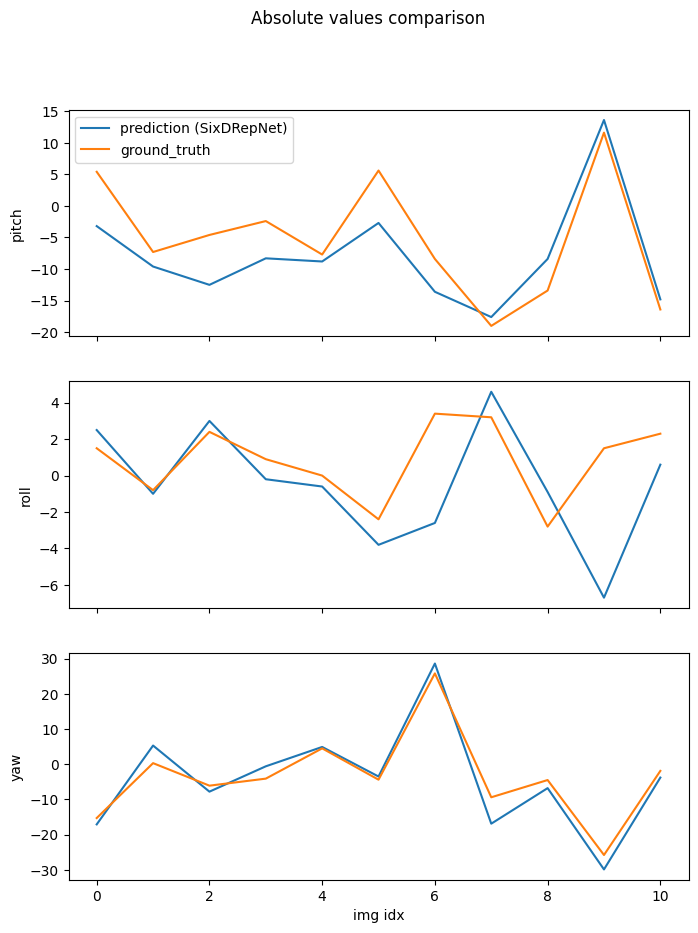

In [3]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches((8, 10))
fig.suptitle("Absolute values comparison")

img_idx = list(range(len(dl)))
# pitch
ax1.plot(img_idx, meta_predictions["pitch"], label=f"prediction (SixDRepNet)")
ax1.plot(img_idx, meta_ground_truth["pitch"], label=f"ground_truth")
ax1.set(xlabel="img idx", ylabel="pitch")

# roll
ax2.plot(img_idx, meta_predictions["roll"], label=f"prediction (SixDRepNet)")
ax2.plot(img_idx, meta_ground_truth["roll"], label=f"ground_truth")
ax2.set(xlabel="img idx", ylabel="roll")

# yaw
ax3.plot(img_idx, meta_predictions["yaw"], label=f"prediction (SixDRepNet)")
ax3.plot(img_idx, meta_ground_truth["yaw"], label=f"ground_truth")
ax3.set(xlabel="img idx", ylabel="yaw")

for ax in (ax1, ax2, ax3):
    ax.label_outer()

ax1.legend(loc="best")
plt.show()

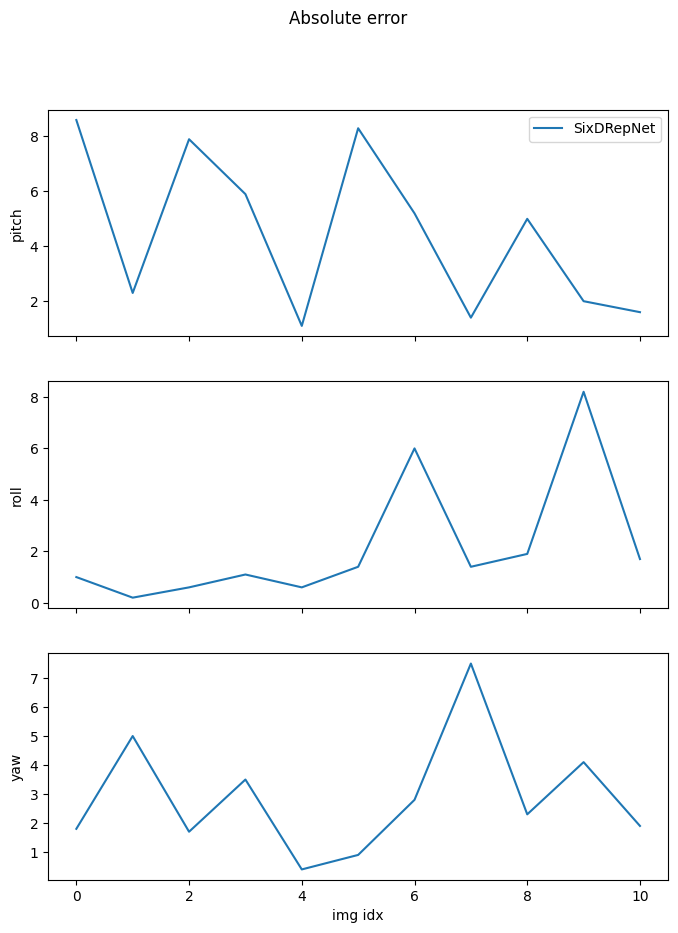

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches((8, 10))
fig.suptitle("Absolute error")

img_idx = list(range(len(dl)))


def rel_err(val, val_ref):
    return np.abs((np.array(val) - np.array(val_ref)))  # /np.array(val_ref)*100.


# pitch
ax1.plot(img_idx, rel_err(meta_predictions["pitch"], meta_ground_truth["pitch"]), label="SixDRepNet")
ax1.set(xlabel="img idx", ylabel="pitch")

# roll
ax2.plot(img_idx, rel_err(meta_predictions["roll"], meta_ground_truth["roll"]), label="SixDRepNet")
ax2.set(xlabel="img idx", ylabel="roll")

# yaw
ax3.plot(img_idx, rel_err(meta_predictions["yaw"], meta_ground_truth["yaw"]), label="SixDRepNet")
ax3.set(xlabel="img idx", ylabel="yaw")

for ax in (ax1, ax2, ax3):
    ax.label_outer()

ax1.legend(loc="best")
plt.show()